# Computational Problem #1 -- The Solar Spectrum

This computational problem provides an intro to using iPython notebooks to make calculations and visualize the results.

Specifically, this notebook provides examples of:
    * importing key packages (like matplotlib and numpy);
    * defining a new function;
    * reading in data from external files;
    * displaying plots with linear and logarithmic axes;

The rest of this notebook provides a basic introduction to iPython notebooks, and then performs some calculations to compare the Solar spectrum to that of a perfect blackbody.  

Read through the rest of this notebook, completing tasks that are highlighted in **bold text**.  You will probably have questions as you read through this; feel free to contact me for help, and/or consult additional documentation on how to install and run iPython notebooks (https://jupyter.readthedocs.io/en/latest/install.html), and the matplotlib (http://matplotlib.org) and numpy (http://docs.scipy.org/doc/numpy/user/) packages. 

If you could use an introduction or refresher on Sections 2, 3.5, 4 and 5 of the 'Python for Astronomers' tutorial may also be helpful for introducing or refreshing concepts about how to run python, work with arrays, use IF and FOR loops, and make figures. YOu store information in arrays, 

iPython notebooks allow us to make calculations, generate figures, and write text to remind us what all of it means.

The goal of this notebook is to generate figures to visualize the Solar spectrum and then calculate the Sun's temperature, apparent bolometric flux, and bolometric luminosity. 

The basic unit of an iPython notebook is a 'cell', which is just a block of python commands or regular text, depending on how it is formatted.  Indeed, this text is actually contained in a cell: if you click on this text, you'll see a green outline appear around the cell.

iPython distinguishes between cells that contain 'code', or a series of python commands, and cells containing 'Markdown' text.  In Markdown text, you can insert small commands that tell the computer how you want the text formatted, in the same way that a web browser reads and then renders an HTML file.  

But don't take my word for it: try it for yourself:

**0. If you are reading this notebook in a web browser, you will need to download the notebook (an .ipyb file) along with the associated solar spectrum file (SolarSpectrum.tbl) and open them in a python environment on the computer you are using to complete the rest of the steps.**

**1. Click on this block of markdown text to select this cell. **

**2. Once this cell is selected, insert a new cell at the top of this notebook using the 'Insert Cell Above' command in the 'Insert' menu at the top of this tab. **

**3. By default, new cells start as 'code' cells: use the dropdown menu above to change your new cell's format from 'code' to 'Markdown'**

**4. Click on your new cell to get a cursor, then type in your name and the assignment name ('Workbook One: Blackbody Radiation') .**

**5. Note that your new cell won't render as nicely formatted text until you run the cell, either with shift+return or the triangular 'play' button in the toolbar at the top of this tab.**

**6. Now explore what happens when you change the cell type to the other options in the dropdown menu.  What happens when you select one of the Heading options?  Or the rawNBConvert option?** 

**7. Re-run the cell in the formatting that you like best, making sure that your name and assignment title display correctly, as I'll need to know who you are to give you credit for this tutorial!**

**8. Once you've re-run the cell, save the notebook by clicking on the 'File' menu at the top of this tab, and selecting the 'Save and Checkpoint' command. ** Save your work early and often -- it is painful and frustrating to lose an hour of work because the computer or browser crashes without saving the notebook. 

Now wait -- aren't you wondering how I bolded that text above?  To see, just click double-click on this cell: that will allow you to see the raw Markdown text in this cell.  Once you view the Markdown text, however, the code won't revert to its nicely formatted version until you re-run the cell, either using the trigangular 'play' button above, or by pressing shift+return. For more on Markdown formatting, see this cheat sheet: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet 

Enough about Markdown; let's start analyzing the solar spectrum.  

The first step in using python is to import the packages we plan to use, with import statements like those in the cell below. 

** Run the code in the cell below, by clicking on the cell and either pressing the triangular 'play' button in the toolbar above, or hitting shift+return once you see your cursor in the cell. **

In [63]:
#import packages that we'll use in this notebook.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#this 'magic' matplotlib command tells iPython to show any figures in this notebook, 
#rather than a separate window or saving them in separate files.
%matplotlib inline

#These commands help python remember how to format my figures so that they look nice
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

Note that in practice, you may not realize what packages you'll need when you start developing a notebook.  That's ok, as you can always add new packages to this 'import' cell, and then rerun it to make those packages available in your notebook.

From here on out, let's use Markdown text more sparingly: where possible, we can instead use a brief 'comment' to remind ourselves what the code in that cell does. 

Python interprets all text on a single line following the pound or hash symbol (#) as a comment.  For example...

In [64]:
#Read in the solar spectrum, which is just a set of flux measurements at specific wavelengths
SolarWavelength, SolarFlux = np.loadtxt('SolarSpectrum.tbl', usecols=range(2), skiprows=3, unpack=True)

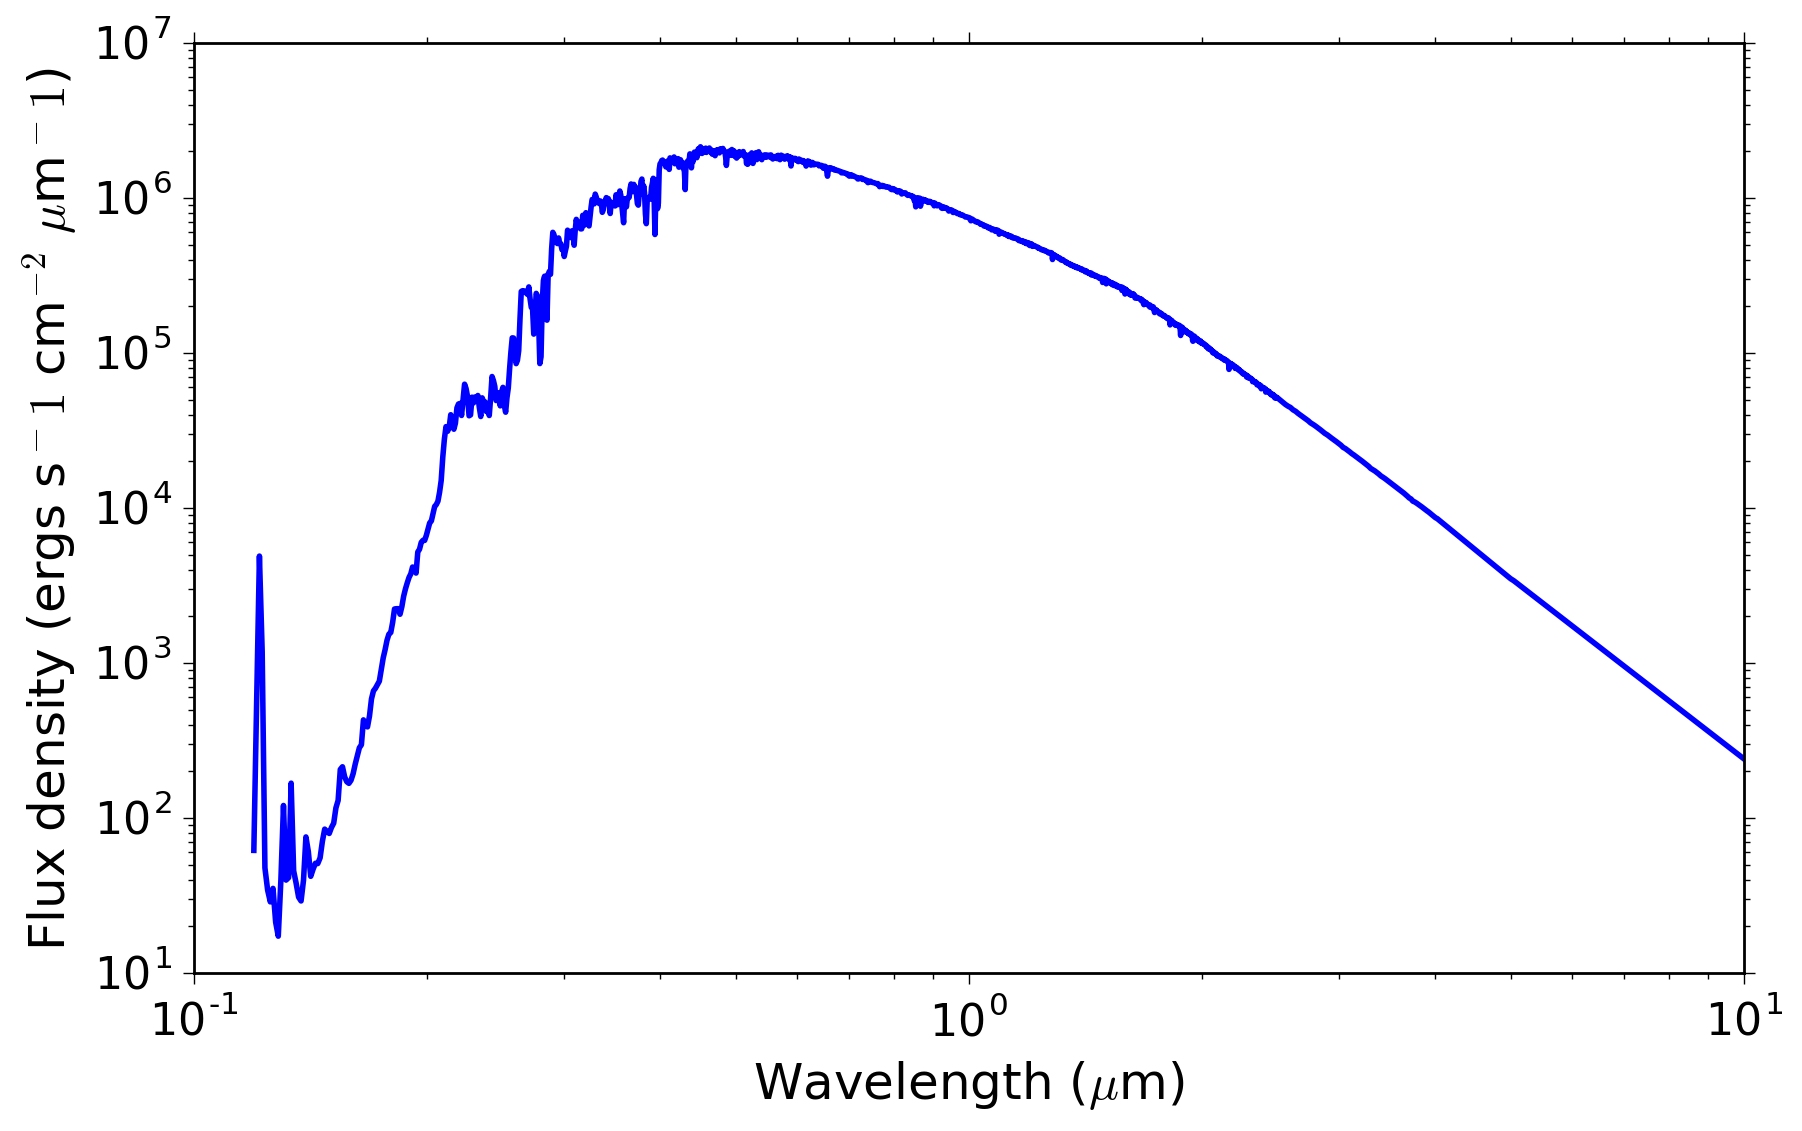

In [65]:
#now make a figure that shows the solar spectrum.
#use log axes in both x and y, and set the x axis to go from 0.1 to 10 microns so that it matches Figure 2.1
plt.loglog(SolarWavelength,SolarFlux,linewidth = 2)
plt.xlim(0.1,10)
plt.ylim(10,1e7)
xlabel = plt.xlabel('Wavelength ($\mu$m)') 
ylabel = plt.ylabel('Flux density (ergs s${^-1}$ cm$^{-2}$ $\mu$m${^-1}$)');

The plot above matches the format of Figure 2.1 in the text, so now to make a plot that matches the format of 2.6, we need to adjust the x axis to show the region from 0.4 to 1 microns, on a linear scale.

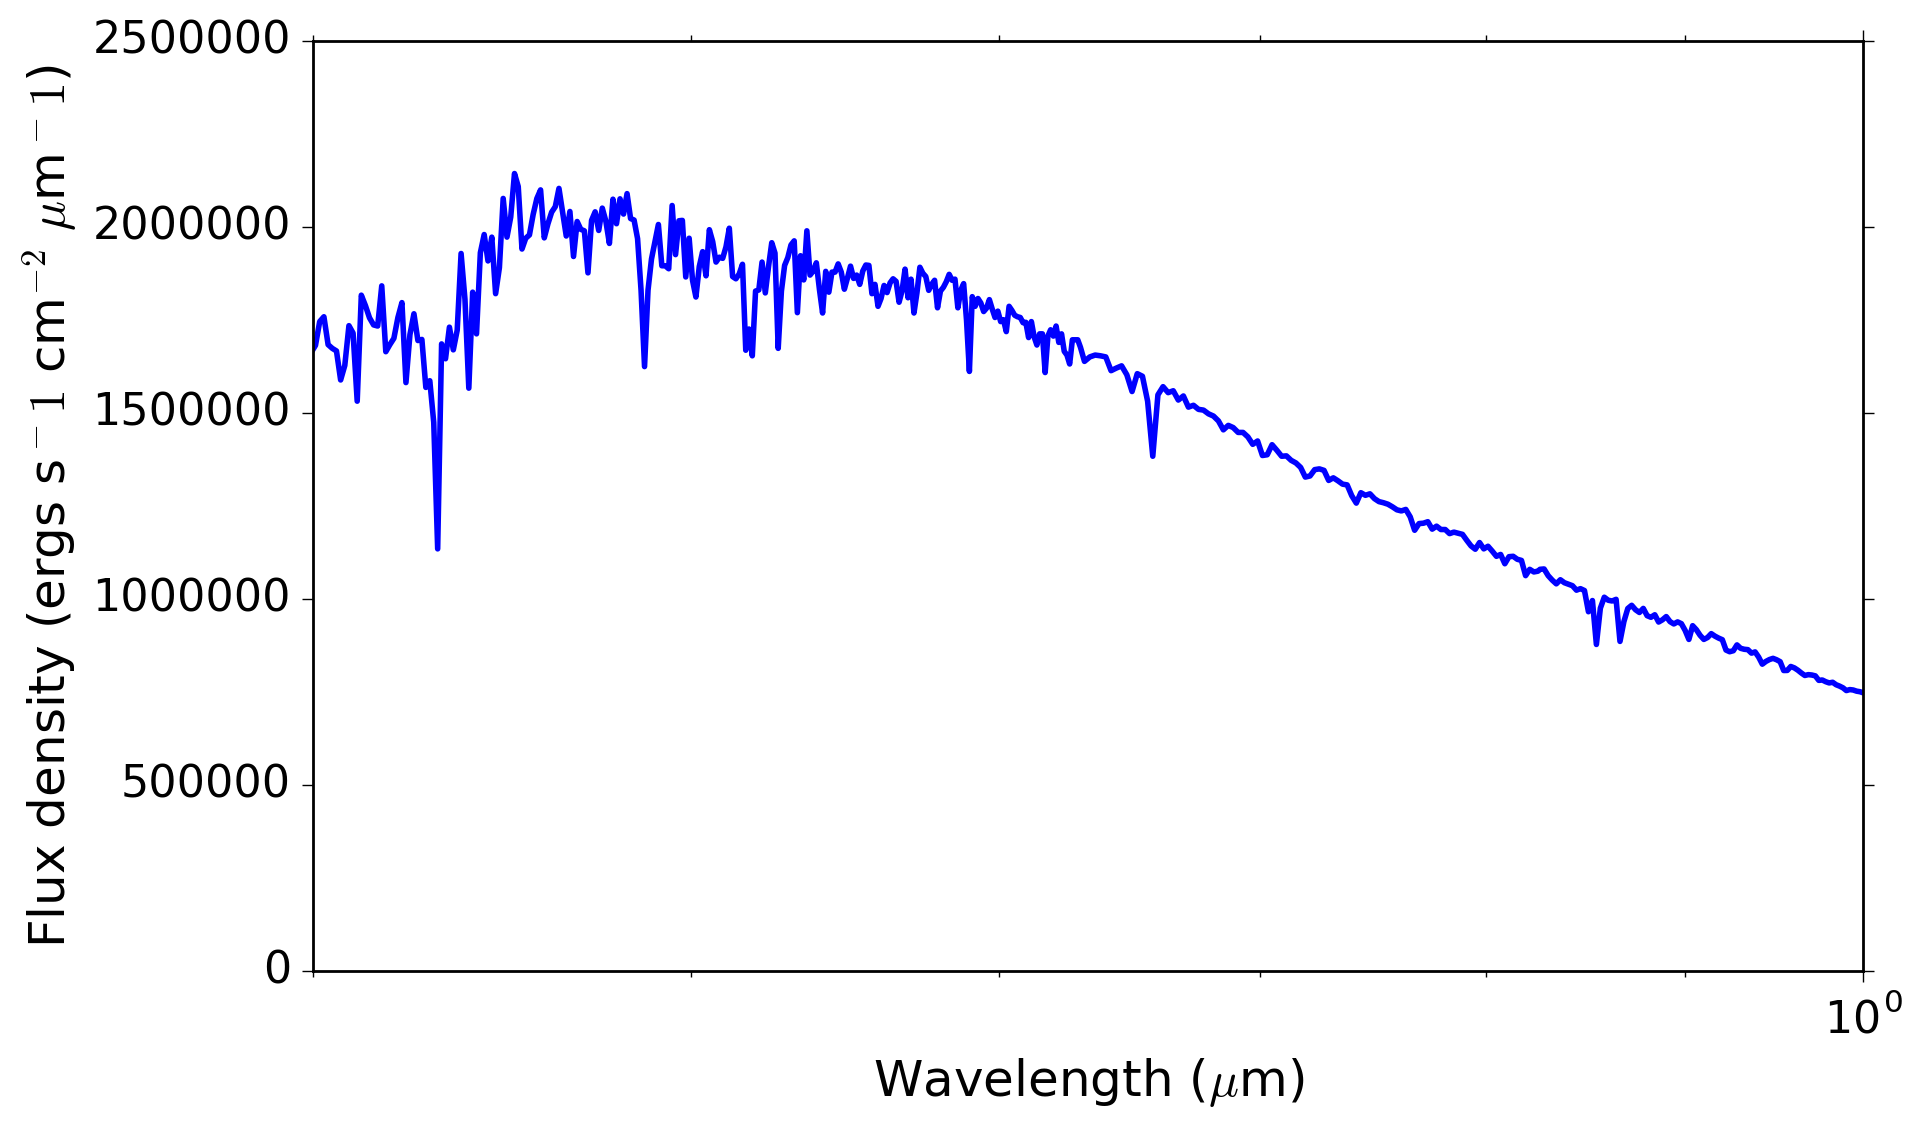

In [66]:
#now make a figure that shows the solar spectrum.
#use log axes in both x and y, and set the x axis to go from 0.1 to 10 microns so that it matches Figure 2.1
plt.semilogx(SolarWavelength,SolarFlux,linewidth = 2)
plt.xlim(0.4,1)
plt.ylim(0,2.5e6)
xlabel = plt.xlabel('Wavelength ($\mu$m)') 
ylabel = plt.ylabel('Flux density (ergs s${^-1}$ cm$^{-2}$ $\mu$m${^-1}$)');

Now that we've displayed the solar spectrum, let's answer parts b, c and d

# Part b

In [67]:
#find the wavelength of maximum flux density in the solar spectrum
lambda_max = np.argmax(SolarFlux)
print(SolarWavelength[lambda_max])

0.4505


In [68]:
#find the temperature of a blackbody that has a maximum flux density at 0.45 microns.
Solar_temp = 2900 / 0.4505
print(Solar_temp)

6437.291897891232


So the solar spectrum has a peak wavelength of 0.45 microns, which Wein's law implies corresponds to a temperature of 6400 Kelvin.

In [69]:
#use trapezoidal integration to integrate the solar spectrum
bolometric_flux = np.trapz(SolarFlux, SolarWavelength)
print(bolometric_flux)

1366090.79684


Our integration of the solar spectrum indicates a bolometric flux of 1.366x10^6 ergs / s / cm$^2$

# Part C

In [70]:
#calculate the solar luminosity as L = 4 pi d^2 bolometric_flux
pi = 3.1415
au = 1.5e13

Solar_L = 4 * pi * au**2 * bolometric_flux
print(Solar_L)

3.86241681444e+33


So our calculation is consistent with the canonical value of the Sun's luminosity: 3.86x10$^{33}$ ergs / s